In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<strong> Chapter 12 </strong>: Okay, now we are really getting into programing because now we get to talk about loops.  What if for reasons known only to me I wanted to print "Hello World" five times?  How might I make Python do that?  One way to do that is with a while loop.  Let me show you what I mean.

In [1]:
count = 1
while count<=5:
    print "Hello World"
    count = count + 1

Hello World
Hello World
Hello World
Hello World
Hello World


Now that did what we wanted, but let's fuss a little about how that works.  For example we could add a little more information to get a better idea of how we update the variable 'count'.

In [2]:
count = 1
while count<=5:
    print "Hello World"
    print "The current iteration count is %d" % count
    count = count + 1

Hello World
The current iteration count is 1
Hello World
The current iteration count is 2
Hello World
The current iteration count is 3
Hello World
The current iteration count is 4
Hello World
The current iteration count is 5


So what do we see happening here?  We start with 'count = 1'.  This passes the test, 'count<=5', since one is less than five.  Then we print a couple of key things, and then we update 'count'.  Note, we can write this code in the more compact form 

In [3]:
count = 1
while count<=5:
    print "Hello World"
    count += 1

Hello World
Hello World
Hello World
Hello World
Hello World


Okay, now let's do something cool.  Let's build a program to compute the greatest common divisor, or gcd, between two positive integers $a$ and $b$.  First, though, we need to learn something fundamental about integers.  You already know this, but we have to make it more formal.  So let's suppose that $b>a>1$, which we can do without loss of generality.  Then, we can write 

$$
b = n_{0}a + r_{0}, ~r_{0}=0,\cdots,a-1
$$

All we are saying here is that if we divide $a$ into $b$, we get that $b$ is some multiple of $a$ plus a remainder $r_{0}$, and if we have a remainder, it must be *strictly* less than $a$.  This is a super important point.  Lastly, we formalize the notion of a remainder by say that $r_{0}$ is $b$ 'mod' $a$, or we say 

$$
b \equiv r_{0} ~(\mbox{mod}~ a)
$$

Now suppose that $b$ was a multiple of $a$, so that the remainder $r_{0}=0$.  Then we can see that 

$$
gcd(a,b) = a, ~ \mbox{if} ~ r_{0}=0
$$

Okay, but what if $r_{0}>0$?  Well, let's keep in mind that $r_{0}$ is strictly less than $a$, so using the logic from above, we can write

$$
a = n_{1} r_{0} + r_{1}, ~ r_{1} = 0,\cdots,r_{0}-1
$$

Again, note, $r_{1}$ is *strictly* less than $r_{0}$.  We can now ask, what if $r_{1}=0$?  Well then that means

$$
a = n_{1} r_{0},
$$

and so that implies

$$
b = n_{0}n_{1}r_{0} + r_{0} = (n_{0}n_{1} + 1)r_{0}
$$

and so we see $r_{0}$ divides both $a$ and $b$, and without too much fuss, we can see that 

$$
r_{0} = gcd(a,b), ~\mbox{if} ~ r_{1} = 0.
$$

But what if $r_{1}>0$?  Then we will just do the same thing and compute 

$$
r_{0} = n_{2}r_{1} + r_{2}, ~ r_{2} = 0,\cdots,r_{1} - 1.
$$

Now we test, is $r_{2}=0$?  If it is, that makes $r_{1}$ the greatest common divisor.  If not, then we have to repeat the process.  Now, do you need to apply an explicit stopping criteria?  What does a flow chart look like for this process?

The next thing to fuss about is how do we find remainders?  That is where we use the 'mod(,)' command.  So we have 

In [ ]:
from numpy import mod as nmod

In [ ]:
print nmod(7,2)

In [ ]:
print 7%2

Okay, so 'mod' or '%' gives us remainders.  So let's start our program.  First we take as input $a$ and $b$, and the way we have this set up, we want to know which is bigger.  So before we do anything, we test and switch.  Let me show you what I mean

In [6]:
def gcd(a,b):
    
    if a>b:
        b,a = a,b
    
    r0 = b%a
    while r0!=0:
        b = a
        a = r0
        r0 = b%a
    return a

In [8]:
gcd(302,44)

2

In [9]:
def gcd_terse(a,b):
    if a>b:
        b,a = a,b
    
    r0 = b%a
    while r0!=0:
        b,a = a,r0
        r0 = b%a
    return a

In [10]:
gcd_terse(302,44)

2

Now, let's talk a little bit about one of the problems in the homework in which you are asked to 
compute 

$$
\sum_{k=1}^{n} \frac{\pi^{-k}}{k!}
$$

Now one way to do this of course is to write the following program.  Well, actually, I'm giving you a skeleton and you have to fill it in.  But it's kind of the same thing.  Sort of.  

In [16]:
from numpy import pi as Pi
from math import factorial as factorial
def weird_sum(n):
    k = 1
    Pinv = Pi**(-1.)
    Sk = Pinv
    tk = Pinv
    while k<n:
        k+=1 
        tk *= Pinv/k 
        Sk += tk 
    return Sk

In [17]:
weird_sum(5)

0.3748007143681301

But if you think about this, this is kind of inefficient since each term in the sum is really the product of the previous term and a new term.  What I mean is 
$$
\frac{\pi^{-k}}{k!} = \frac{\pi^{-(k-1)}}{(k-1)!}\frac{\pi^{-1}}{k}
$$

How could you modify your existing code to take advantage of this fact?  Use the skeleton below to guide you.  

In [3]:
def weird_sum_rec(n):
    

In [ ]:
print weird_sum_rec(5)

Now let's think about prime numbers and how to test if a number is prime.  The simplest algorithm would work like 

Given input integer $n$, start dividing by every number, say $1<k<n$.  If $n\%k=0$, stop, else, number is prime.  

Okay, your turn.  Give me a flow chart, and then give me a function using the skeleton below. The function should tell the user if the input number is prime or not.  To do this, you will need to make use of the Python command `break`, which simply stops a loop when it is called.  

In [1]:
def prime_test(n):
    if n>2:
        if n%2 == 0:
            return False
        else:
            cnt = 3
            while n%cnt != 0:
                cnt += 2
            if cnt < n:
                return False
            else:
                return True
    elif n==1 or n==2:
        return True

In [6]:
prime_test(103)

True

Now can you figure out how to use this function to list out all the possible prime numbers up to 200?  First, you will want to modify the above prime test function to instead of printing statements return say a 1 if a number is a prime and a zero if it is not.  Use the skeleton below to thresh this out.  

In [2]:
def prime_test_mod(n,plist):
    cnt = 1
    while cnt < len(plist):
        if n%plist[cnt] == 0:
            return False
        else:
            cnt+=1
    return True    

In [11]:
def prime_print_list(n):
    plist = [1,2]
    cnt = 3
    while cnt <= n:
        
        if prime_test_mod(cnt,plist):
            plist.append(cnt)
        cnt+=1
    return plist

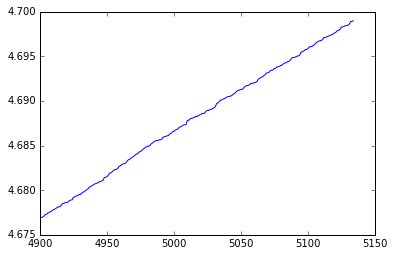

In [27]:
pvals = prime_print_list(50000)
xvals = range(1,len(pvals)+1)
plt.plot(xvals,np.log10(pvals[4899:]))

Now what if instead of printing all the primes, we wanted to print some subset of the primes?  In this case, we would use what is called slicing.  

In [3]:
prime_print_list(20)

[1, 2, 3, 5, 7, 11, 13, 17, 19]
